In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
import matplotlib.pyplot as plt

# Importing the csv file and creating a dataframe using pandas
data = pd.read_csv("Clean_Dataset.csv")

# Printing the head of the dataframe 
display(data.head())

# Printing the column names of the dataframe
print(data.columns)


# General statistics
print(data.dtypes)
display(data.describe())
display(data.info())


# inspecting the unique values of some columns

columns_of_interest = ["airline", "source_city", "destination_city", "departure_time", "arrival_time", "stops", "class"]

for column in columns_of_interest:
    print(f'The unique values of {column} are: {data[column].unique()}\n')

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')
Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


None

The unique values of airline are: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

The unique values of source_city are: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

The unique values of destination_city are: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

The unique values of departure_time are: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

The unique values of arrival_time are: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

The unique values of stops are: ['zero' 'one' 'two_or_more']

The unique values of class are: ['Economy' 'Business']



In [3]:
    
"""
Preprocessing

We are going to proceed one_hot encoding for the columns:
airline, source_city, destination_city and departure_time
as they have a small number of non-numerical unique values .

Then we are going to turn the class column to binary as it contains ony two non numerical values
and the the stops column values to numerical 0, 1 and 2.

Also we are going to drop the Unnamed: 0 and flight columns as the are not nessecary for our analysis
and finaly we are going to let columns duration, days_left and price as they are.

"""

data = data.drop(["Unnamed: 0", "flight"], axis=1)
data["class"] = data["class"].apply(lambda x: 0 if x == "Economy" else 1)
data["stops"] = pd.factorize(data["stops"])[0]

display(data.head())

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955


Preprocessing

We are going to proceed one_hot encoding for the columns:
airline, source_city, destination_city and departure_time
as they have a small number of non-numerical unique values .

Then we are going to turn the class column to binary as it contains ony two non numerical values
and the the stops column values to numerical 0, 1 and 2.

Also we are going to drop the Unnamed: 0 and flight columns as the are not nessecary for our analysis
and finaly we are going to let columns duration, days_left and price as they are.


In [5]:
# Get the dummies of source city column and join them  to the dataframe
source_city_dummies = pd.get_dummies(data["source_city"], prefix="source_city")
data = data.join(source_city_dummies)

# Get the dummies of destination_city column and join them  to the dataframe
destination_city_dummies = pd.get_dummies(data["destination_city"], prefix="destination_city")
data = data.join(destination_city_dummies)

# Get the dummies of airline column and join them  to the dataframe
airline_dummies = pd.get_dummies(data["airline"], prefix="airline")
data = data.join(airline_dummies)

# Get the dummies of arrival_time column and join them  to the dataframe
arrival_time_dummies = pd.get_dummies(data["arrival_time"], prefix="arrival_time")
data = data.join(arrival_time_dummies)

# Get the dummies of departure_time column and join them  to the dataframe
departure_time_dummies = pd.get_dummies(data["departure_time"], prefix="departure_time")
data = data.join(departure_time_dummies)

data = data.drop(["airline", "source_city", "destination_city", "departure_time", "arrival_time"], axis=1)

display(data)

,stops,class,duration,days_left,price,source_city_Bangalore,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,departure_time_Afternoon,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,0,2.17,1,5953,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


R Squared 0.9855234008506831
Mean Absolute Error 1065.8513875890817
Mean Squared Error 7458154.628920532
Root Mean Squared 2730.962216677582


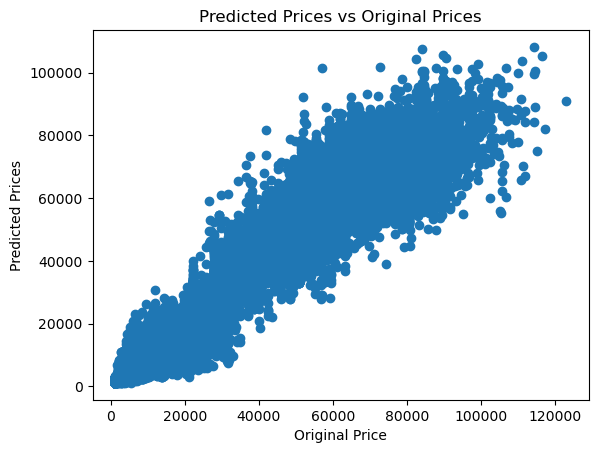

In [7]:
from sklearn.model_selection import KFold, cross_val_predict
# Training Regression Model
data_without_price = data.drop("price", axis=1) # Excluding the target variable 'price' column
X, y = data_without_price, data["price"] # Features are everything except 'price', target is 'price'

# Initialize the RandomForestRegressor model
rf = RandomForestRegressor()

# Using K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation predictions
y_pred = cross_val_predict(rf, X, y, cv=kf)

# Calculate and print the R^2 score
print('R Squared', r2_score(y, y_pred))

# Calculate and print the Mean Absolute Error
print('Mean Absolute Error', mean_absolute_error(y, y_pred))

# Calculate and print the Mean Squared Error
print('Mean Squared Error', mean_squared_error(y, y_pred))

# Calculate and print the Root Mean Squared Error
print('Root Mean Squared', math.sqrt(mean_squared_error(y, y_pred)))

# Plot the predicted prices vs the original prices
plt.scatter(y, y_pred)
plt.xlabel("Original Price")
plt.ylabel("Predicted Prices")
plt.title("Predicted Prices vs Original Prices")
plt.show()

In [9]:

# Train the model on the entire dataset to get feature importances
rf.fit(X, y)

#Extracting feature names and their importances from the model
feature_names = rf.feature_names_in_ # Getting the names of the features used by the model
feature_importances = rf.feature_importances_ # Getting the importance of each feature

# Combining the feature names and their importances into a dictionary
importances =  dict(zip(feature_names, feature_importances))

#Sorting the features by their importances in descending order
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True) # importances.items() -list of tuples, x[1] for the second ellement, reverse=True for descending order

#Print the top five sorted list of features and their importances
top_five_importances = sorted_importances[:5]
display(top_five_importances)

[('class', 0.8799687014232894),
 ('duration', 0.057552589791272646),
 ('days_left', 0.018542387768020224),
 ('airline_Air_India', 0.005137516484467199),
 ('airline_Vistara', 0.004845484191463134)]

<BarContainer object of 5 artists>

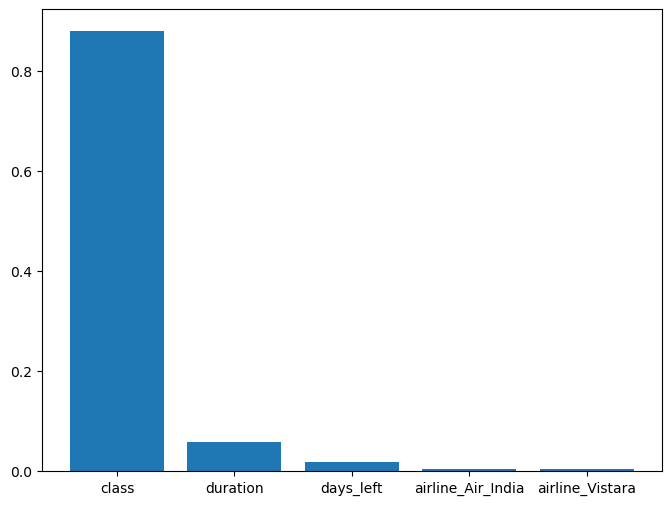

In [11]:
plt.figure(figsize=(8, 6))
plt.bar([x[0] for x in top_five_importances],
        [x[1] for x in top_five_importances]
        )

In [15]:
# Function to preprocess new data
def preprocess_new_data(new_data):
    # Apply the same transformations as the training data
    new_data["class"] = new_data["class"].apply(lambda x: 0 if x == "Economy" else 1)
    new_data["stops"] = pd.factorize(new_data["stops"])[0]

    # One-hot encode categorical variables
    new_data = pd.get_dummies(new_data, columns=["airline", "source_city", "destination_city", "departure_time", "arrival_time"])

    # Ensure the new data has the same columns as the training data
    missing_cols = set(X.columns) - set(new_data.columns)
    for col in missing_cols:
        new_data[col] = 0
    new_data = new_data[X.columns]

    return new_data

# Example new data for prediction
new_data = pd.DataFrame({
    "airline": ["IndiGo"],
    "source_city": ["Delhi"],
    "destination_city": ["Cochin"],
    "departure_time": ["Morning"],
    "arrival_time": ["Evening"],
    "stops": ["1 stop"],
    "class": ["Economy"],
    "duration": [180],
    "days_left": [30]
})

# Preprocess the new data
new_data_preprocessed = preprocess_new_data(new_data)

# Predict the price for the new data
predicted_price = rf.predict(new_data_preprocessed)

print("Predicted Price:", predicted_price)

Predicted Price: [7030.2]
